# Visualize the confidence of prediction
We use decision_function of SVC to plor the confidence of the prediction.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

In [31]:
from split import *
data_df = pd.read_csv('data/XRF_ML_cr.csv')
X = data_df.iloc[:, 1:-2].values
y = data_df['facies_merge_2'].values
groups = data_df['core_section'].values

train_idx, test_idx = my_train_test_split(y, groups)
trainn_idx, dev_idx = my_train_test_split(y[train_idx], groups[train_idx])

In [33]:
info_df = pd.read_csv('data/info.cleaned.all.csv', index_col=0)
info_dev = info_df.loc[data_df.composite_id[train_idx[dev_idx]], :]

In [36]:
groups_dev = groups[train_idx[dev_idx]]
y_dev = y[train_idx[dev_idx]]
print(np.unique(groups_dev[y_dev == 10])) # moraine in dev set
print(np.unique(groups_dev[y_dev == 0])) # shoreface in dev set

['N70-1' 'N70-3' 'N72-4' 'VVC18-1']
['N11-2' 'N11-4' 'N61-1' 'N69-5' 'N85-4']


In [35]:
facies = ['shoreface', 'channel', 'beach-foreshore', 'sand flat', 'mud flat',
       'lagoon', 'peat', 'soil', 'eolian/fluvial (W)',
       'shallow marine', 'moraine', 'eolian/fluvial']

Facies = []
for fa in facies:
    Facies.append(fa.capitalize())

Facies

['Shoreface',
 'Channel',
 'Beach-foreshore',
 'Sand flat',
 'Mud flat',
 'Lagoon',
 'Peat',
 'Soil',
 'Eolian/fluvial (w)',
 'Shallow marine',
 'Moraine',
 'Eolian/fluvial']

## SVC model
The score produced by decision_function is selected as the representative of confidence. Choose N70-1, which has sediment facies (shoreface for the whole section) that belongs to those ambiguous facies in Holocene shallow marine. In contrast, N70-1 is chosen because it has only moraine deposit, that is well classified by machine. These section are in the dev set.

In [58]:
from joblib import load
svc = load('models/roll_svc_trainn_model_20210511.joblib')

In [39]:
#y_moraine = data_df.loc[data_df.core_section == 'N70-1', 'facies_merge_2'].values
dec_moraine = svc.decision_function(data_df.loc[data_df.core_section == 'N70-1', data_df.columns[1:-2]].values)
dec_moraine.shape

(432, 12)

In [70]:
# review how matrix transform work
test = np.array([[11, 12, 13], 
                 [12, 22, 23], 
                 [31, 32, 33]])
print(test)
print(test.T)

[[11 12 13]
 [12 22 23]
 [31 32 33]]
[[11 12 31]
 [12 22 32]
 [13 23 33]]


In [59]:
#y_sh = data_df.loc[data_df.core_section == 'N11-2', 'facies_merge_2']
dec_sh = svc.decision_function(data_df.loc[data_df.core_section == 'N85-4', data_df.columns[1:-2]])
dec_sh.shape

(451, 12)

In [60]:
print(dec_sh.max(), dec_moraine.max())

11.322802797578113 11.322641480228842


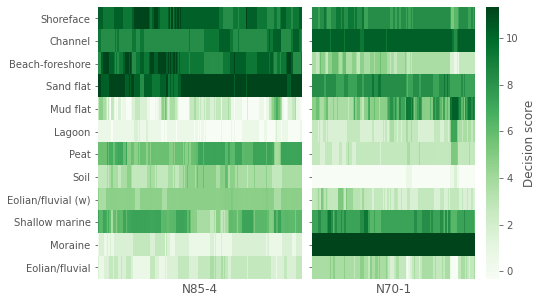

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 5), sharey='row')
sns.heatmap(dec_sh.T, cmap='Greens', yticklabels=Facies, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(dec_moraine.T, cmap='Greens', yticklabels=Facies, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Decision score'})
axes[0].set_xlabel('N85-4')
axes[1].set_xlabel('N70-1')
plt.subplots_adjust(wspace=.05)
#fig.savefig('results/roll_svc_decision_function_{}.png'.format(date))

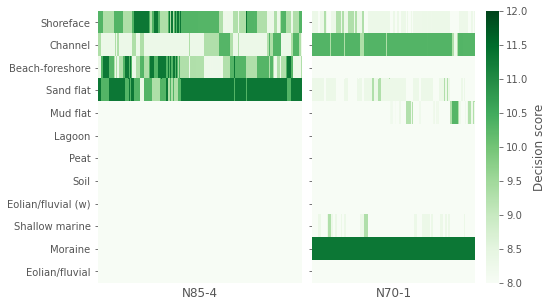

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 5), sharey='row')
sns.heatmap(dec_sh.T, cmap='Greens', vmax=12, vmin=8, yticklabels=Facies, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(dec_moraine.T, cmap='Greens', vmax=12, vmin=8, yticklabels=Facies, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Decision score'})
axes[0].set_xlabel('N85-4')
axes[1].set_xlabel('N70-1')
plt.subplots_adjust(wspace=.05)
#fig.savefig('results/roll_svc_decision_function_{}.png'.format(date))

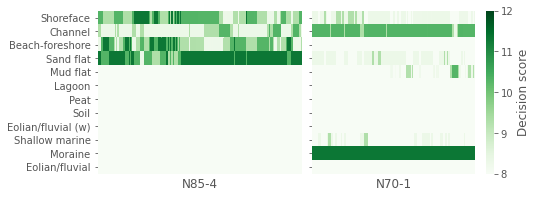

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3), sharey='row')
sns.heatmap(dec_sh.T, cmap='Greens', yticklabels=Facies, vmax=12, vmin=8, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(dec_moraine.T, cmap='Greens', yticklabels=Facies, vmax=12, vmin=8, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Decision score', 'ticks': [8, 9, 10, 11, 12]})
axes[0].set_xlabel('N85-4')
axes[1].set_xlabel('N70-1')
plt.subplots_adjust(wspace=.05)
fig.savefig('results/roll_svc_decision_function_{}.png'.format(date))

In [80]:
info_df.loc[info_df.core_section=='N85-4', 'section_depth_mm']

composite_id
N85_00067      92.0
N85_00069      94.0
N85_00071      96.0
N85_00073      98.0
N85_00075     100.0
              ...  
N85_01035    1060.0
N85_01037    1062.0
N85_01039    1064.0
N85_01041    1066.0
N85_01043    1068.0
Name: section_depth_mm, Length: 486, dtype: float64

## SVC model with probability
I retrain the SVC model using the same paramters but set probibility as True to give ability to produce the "calibrated" probability.

In [64]:
from joblib import load
svc = load('models/roll_svc_prob_model_20210429.joblib')

In [65]:
pro_sh = svc.predict_proba(data_df.loc[data_df.core_section == 'N85-4', data_df.columns[1:-2]])
y_sh = data_df.loc[data_df.core_section == 'N85-4', 'facies_merge_2']
y_moraine = data_df.loc[data_df.core_section == 'N70-1', 'facies_merge_2'].values
pro_moraine = svc.predict_proba(data_df.loc[data_df.core_section == 'N70-1', data_df.columns[1:-2]].values)

In [66]:
pro_sh[0].sum()

1.0

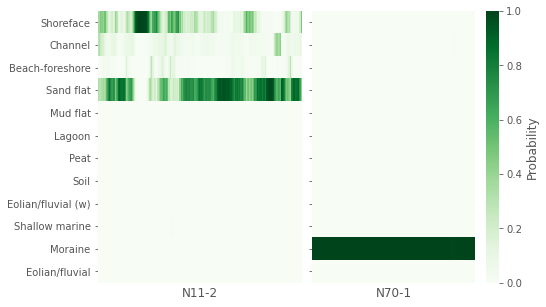

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 5), sharey='row')
sns.heatmap(pro_sh.T, cmap='Greens', yticklabels=Facies, vmax=1, vmin=0, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(pro_moraine.T, cmap='Greens', yticklabels=Facies, vmax=1, vmin=0, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Probability'})
axes[0].set_xlabel('N11-2')
axes[1].set_xlabel('N70-1')
plt.subplots_adjust(wspace=.05)
#fig.savefig('results/roll_svc_probability_{}.png'.format(date))

Well...the inconsistency between prediction and calibrated probability, mentioned by <https://scikit-learn.org/stable/modules/svm.html#scores-and-probabilities>, doesn't really happen in these sections, but it happened when using the section VVC19-3 (only in older version of this notebook). Although the probability indicates clearly that the model is way more confident in classifying moraine deposit, the possible inconsistence makes this figure wrecked.

## RF model with probability
Since the machine was built by using training+dev sets, I can only use the sections in the test set to avoid "the machine already know the answer" problem, which is not consistent to the results above (using dev set). Also this part is the old version, which choose beach-foreshore instead of shoreface.

In [30]:
rf = load('models/roll_rf_model_20201123.joblib')

In [31]:
y_bf = data_df.loc[data_df.core_section == 'VVC19-3', 'facies_merge_2']
pro_bf = rf.predict_proba(data_df.loc[data_df.core_section == 'VVC19-3', data_df.columns[:-2]])
pro_bf.shape

(463, 12)

In [32]:
y_moraine = data_df.loc[data_df.core_section == 'N72-3', 'facies_merge_2'].values
pro_moraine = rf.predict_proba(data_df.loc[data_df.core_section == 'N72-3', data_df.columns[:-2]].values)
pro_moraine.shape

(514, 12)

In [32]:
pro_bf[0].sum()

1.0000000000000007

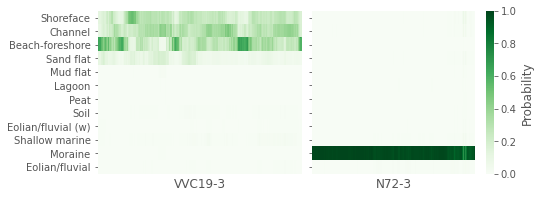

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3), sharey='row')
sns.heatmap(pro_bf.T, cmap='Greens', yticklabels=Facies, vmax=1, vmin=0, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(pro_moraine.T, cmap='Greens', yticklabels=Facies, vmax=1, vmin=0, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Probability'})
axes[0].set_xlabel('VVC19-3')
axes[1].set_xlabel('N72-3')
plt.subplots_adjust(wspace=.05)
fig.savefig('results/roll_rf_probability_{}.png'.format(date))

## Summary
The decision scores of these two core sections can't significant, but okay, show the heuristic meaning that our SVC model is much more confident in classifying moraine deposit than shoreface sediments. Our SVC model doesn't have predict_prob() to produce "calibrated" probability because during training the parameter, probability, was set to False. After retrain the SVC model, we are able to get probability. But the inconsistency between prediction and probability makes it wrecked. The decision score is still the sensible measure. In contrast, the RF model, which has predict_prob() in default, perfectly express the hearistic meaning. Remember, that is also "calibrated" probability.

BTW, the x-axis is the index of the data instead of the section depth. In order to asign correct section depth to compare with core photo, we need to do more about it.

## Curiosity

In [25]:
dec_mf = svc.decision_function(data_df.loc[data_df.core_section == 'N52-3', data_df.columns[:-2]])
y_mf = data_df.loc[data_df.core_section == 'N52-3', 'facies_merge_2']
dec_mf.shape

(557, 12)

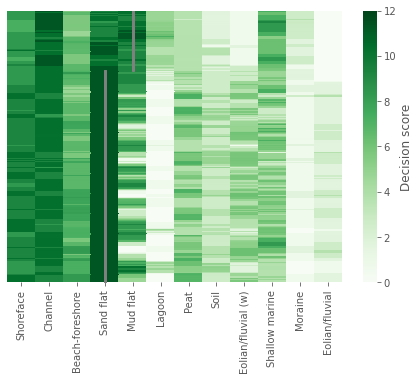

In [29]:
plt.figure(figsize=(7.5, 5))
sns.heatmap(dec_mf, cmap='Greens', xticklabels=Facies, vmax=12, vmin=0, yticklabels=False, 
            cbar_kws = {'label' : 'Decision score'})
plt.scatter(y_mf+.5, range(len(y_mf)), s=6, c='gray')
#plt.subplots_adjust(wspace=.05)
#fig.savefig('results/roll_svc_decision_function_{}.png'.format(date))